## Attempt to summarize all avaliable data on small Josephson junctions, single or array-ed

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML

import JJformulas as jjf


In [2]:
# dropbox_folder = "E:\\Dropbox\\phase%20diffusion\\"

dropbox_folder = "https://www.dropbox.com/home/phase%20diffusion/"

In [11]:
def update_df(df, name, valdict):
    """
    to the dataframe 'df' add line with index 'name' and pairs 'coloumn-value' from valdict. Requires Ro_tot, 
    N and Ej values  
    
    output : updated dataframe
    """
    # todo: implement exceprions
    Ro = df['Ro_tot']/df['N']
    Ic =  jjf.Ic_AB(df['Ej'])
    
    
    df = df.assign(Ro = Ro, Ic_AB = Ic)

    
    for k, v in valdict.items():
        
        df.loc[name, k] = v
        
    return df


def make_link(filename):
    """
    makes html code which link to dropbox file  
    
    output : updated dataframe
    """


    return '<a target="_blank" href={}.pdf>{}</a>'.format(
               dropbox_folder+filename.replace(" ", "%20"), filename)

def show_df(df, sort = None, find = None, which = 'all'):
    """
    shows dataframe in neat way
    
    args:
         df - dataframe to show
         sort - coloumn name to sort df
         find - indices to show (similar to df.filter)
         which - coloumns to show
    
    output : nice-looking df
    """
  
    
    cdf = df.copy()

    cdf['ref'] = cdf['ref'].apply(make_link)

    
    cdf = cdf.sort_index(axis = 0)
    
    cdf = cdf.sort_index(axis = 1)

    if sort is not None:
        cdf = cdf.sort_values(by = [sort])
        
    if find is not None:
        cdf = cdf.filter(like = find, axis = 'index')
        
    if which is not 'all':
        cdf = cdf[which]
    
    display(HTML(cdf.to_html(escape = False, classes='table table-hover', header="true")))
#     return cdf


## exl file init

In [9]:
ft = pd.read_excel("lit_summary.xlsx", index_col = 0)

In [4]:
ft

,Rn_tot,Isw,Ro_tot,N,Rn,Ro,Ec,Ej,Iab,comment,ref,Ic_AB,Ej_alt
id,,,,,,,,,,,,,
Jack PhD p43,47.9,1.500000e-09,1.333333e+04,1,NaN,1.333333e+04,1.0,0.54,NaN,unknown Ec,Jack phd,2.265380e-08,NaN
Jack PhD p54 1,NaN,2.000000e-10,1.000000e+05,1,NaN,1.000000e+05,NaN,0.22,NaN,unknown Ec,Jack phd,9.229327e-09,NaN
Jack PhD p54 2,NaN,5.000000e-11,4.000000e+05,1,NaN,4.000000e+05,NaN,0.10,NaN,unknown Ec,Jack phd,4.195149e-09,NaN
Jack PhD p54 3,NaN,1.500000e-11,1.333333e+06,1,NaN,1.333333e+06,NaN,0.06,NaN,unknown Ec,Jack phd,2.517089e-09,NaN
Jack PhD p54 4,NaN,2.000000e-12,1.000000e+07,1,NaN,1.000000e+07,NaN,0.02,NaN,unknown Ec,Jack phd,8.390297e-10,NaN
Jack PhD p54 5,NaN,5.000000e-13,4.000000e+07,1,NaN,4.000000e+07,NaN,0.01,NaN,unknown Ec,Jack phd,4.195149e-10,NaN
Jack PhD p56 0,NaN,6.600000e-09,3.030303e+03,1,NaN,8.000000e+02,NaN,1.18,NaN,unknown Ec,Jack phd,1.132690e-07,NaN
Jack PhD p56 1,NaN,1.500000e-08,1.333333e+03,1,NaN,1.333333e+03,NaN,1.90,NaN,unknown Ec,Jack phd,7.970783e-08,NaN


 # Jack's thesis

In [7]:
filename =  'jack phd'
display(HTML(make_link(filename)))

filename =  'https://www.fkf.mpg.de/5659827/dok95-Jaeck-Bert-epfl.pdf'
display(HTML('<a target="_blank" href={}>{}</a>'.format(filename,'online pdf')))

STM junctions, Cj ~ 1-2 fF , Ec = 1K (free fitting param), stray capcitance is much greater?

T > 35 mK?

p42
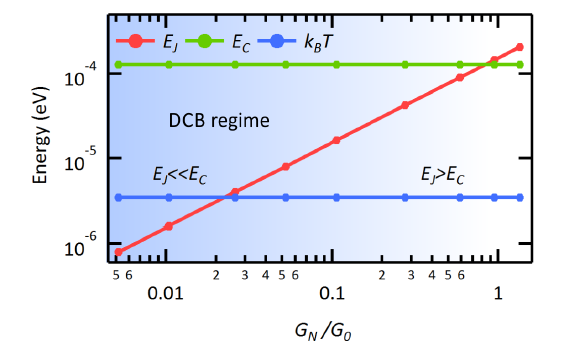

if we trust this guy, EJ (K) = Gn(Go)x2

Gn = 0.27Go -> Ej = 46 ueV = 534 mK (p52) 

**That works only for the experiments in chapter 4, in chap 6 the gaps are different (see p91), so the conversion is also different**

In [103]:
.534/.27

1.9777777777777779

## p43

Gn = 0.27Go -> Ej = 4e-5 eV = 464 mK

p43

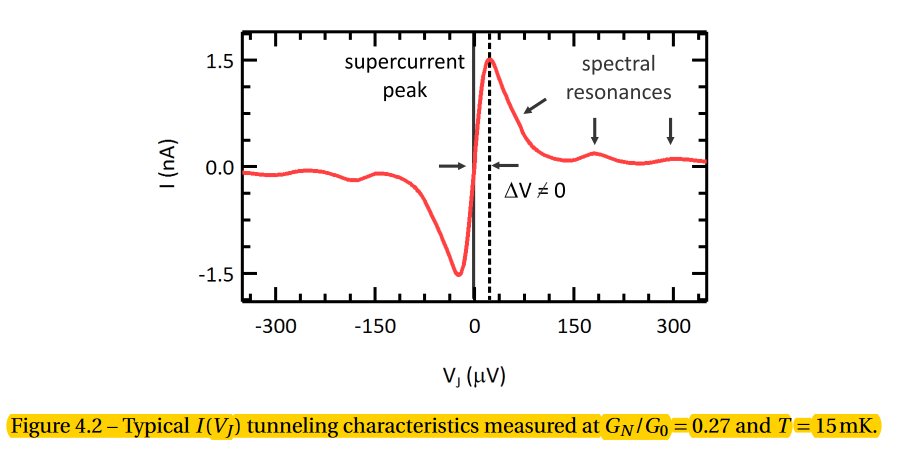

In [106]:
ft = update_df(ft, 
               name = 'Jack PhD p43', 
         
               valdict= {
                      'Ej'      : 0.27*2,
                      'Ro_tot'  : 20e-6/1.5e-9,
                      'Isw'     : 1.5e-9,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

## p54

p54

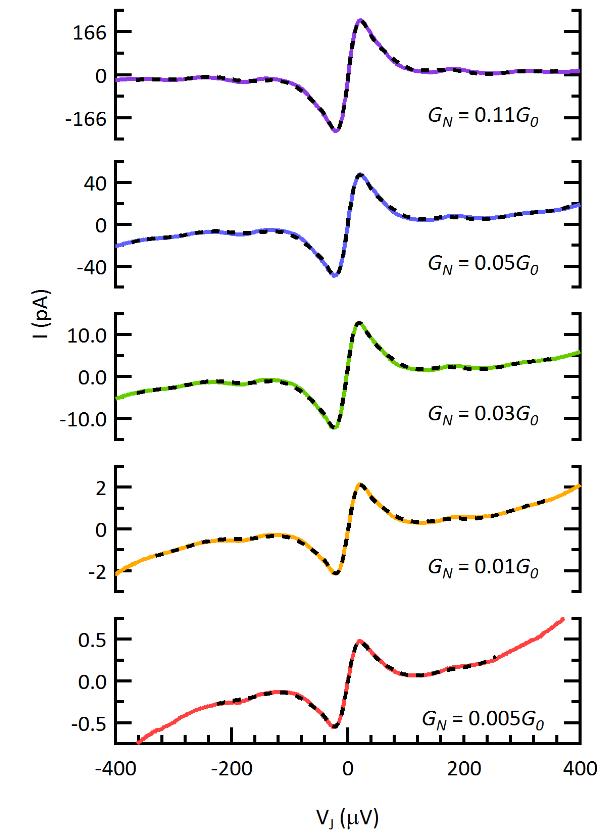

In [120]:
Vmax = 20e-6

In [111]:
ft = update_df(ft, 
               name = 'Jack PhD p54 1', 
         
               valdict= {
                      'Ej'      : 0.11*2,
                      'Ro_tot'  : Vmax/.2e-9,
                      'Isw'     : 0.2e-9,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [112]:
ft = update_df(ft, 
               name = 'Jack PhD p54 2', 
         
               valdict= {
                      'Ej'      : 0.05*2,
                      'Ro_tot'  : Vmax/50e-12,
                      'Isw'     : 50e-12,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [113]:
ft = update_df(ft, 
               name = 'Jack PhD p54 3', 
         
               valdict= {
                      'Ej'      : 0.03*2,
                      'Ro_tot'  : Vmax/15e-12,
                      'Isw'     : 15e-12,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [114]:
ft = update_df(ft, 
               name = 'Jack PhD p54 4', 
         
               valdict= {
                      'Ej'      : 0.01*2,
                      'Ro_tot'  : Vmax/2e-12,
                      'Isw'     : 2e-12,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [116]:
ft = update_df(ft, 
               name = 'Jack PhD p54 5' ,
         
               valdict= {
                      'Ej'      : 0.005*2,
                      'Ro_tot'  : Vmax/.5e-12,
                      'Isw'     : .5e-12,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

## p56

p56

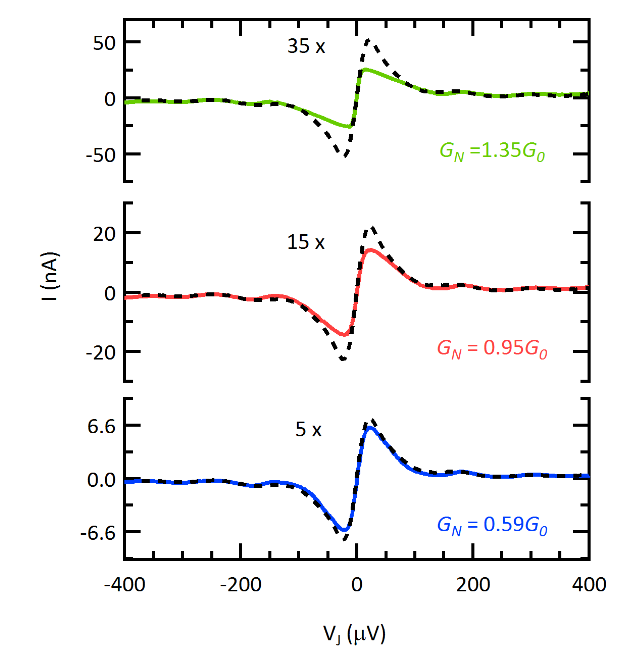

In [120]:
Vmax = 20e-6

In [121]:
ft = update_df(ft, 
               name = 'Jack PhD p56 0', 
         
               valdict= {
                      'Ej'      : 1.35*2,
                      'Ro_tot'  : Vmax/25e-9,
                      'Isw'     : 25e-9,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [122]:
ft = update_df(ft, 
               name = 'Jack PhD p56 1', 
         
               valdict= {
                      'Ej'      : 0.95*2,
                      'Ro_tot'  : Vmax/15e-9,
                      'Isw'     : 15e-9,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

In [123]:
ft = update_df(ft, 
               name = 'Jack PhD p56 0', 
         
               valdict= {
                      'Ej'      : 0.59*2,
                      'Ro_tot'  : Vmax/6.6e-9,
                      'Isw'     : 6.6e-9,
                      'N'       : 1,
                      'comment' : 'unknown Ec',
                      'ref'     : 'Jack phd'}
             )

# {Paper name}

# show full table

In [10]:
show_df(ft, 
         which = ['Ej', 'Isw', 'Ro', 'N', 'ref'],
         sort = 'Ej'
         )

,Ej,Isw,Ro,N,ref
id,,,,,
Jack PhD p54 5,0.01,5.000000e-13,4.000000e+07,1,Jack phd
Jack PhD p54 4,0.02,2.000000e-12,1.000000e+07,1,Jack phd
Jack PhD p54 3,0.06,1.500000e-11,1.333333e+06,1,Jack phd
Jack PhD p54 2,0.10,5.000000e-11,4.000000e+05,1,Jack phd
Jack PhD p54 1,0.22,2.000000e-10,1.000000e+05,1,Jack phd
Jack PhD p43,0.54,1.500000e-09,1.333333e+04,1,Jack phd
Jack PhD p56 0,1.18,6.600000e-09,8.000000e+02,1,Jack phd
Jack PhD p56 1,1.90,1.500000e-08,1.333333e+03,1,Jack phd


# save data

In [125]:
ft.to_excel("lit_summary.xlsx")